# KNN - Predict whether a passenger Survived the Titanic or not

# Importing and Preprocessing the Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.shape

(891, 12)

869 entries is good to run a KNN on since one of the best conditions to use KNN at is while using small datasets. This is because KNN is a lazy learner hence a huge dataset will require alot of computing power.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning and Preparation

In [7]:
#Checking for null values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Imputing Age with the median

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [9]:
#Dropping Column Cabin because the proportion of missing values is too big.
#Dropping Embarked since we will not be using it in the algorithm
#Dropping Passenger ID since it will not be necessary to make predictions
train_df = train_df.drop(['Cabin','Embarked','PassengerId','Ticket','Name'], axis = 1)


In [10]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [11]:
#Checking for duplicates
train_df.duplicated().any()

True

In [12]:
#Checking for anomalies in the data
for column in train_df:
    unique_vals = np.unique(train_df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Survived :2 -- [0 1]
The number of values for feature Pclass :3 -- [1 2 3]
The number of values for feature Sex :2 -- ['female' 'male']
The number of values for feature Age :88
The number of values for feature SibSp :7 -- [0 1 2 3 4 5 8]
The number of values for feature Parch :7 -- [0 1 2 3 4 5 6]
The number of values for feature Fare :248


In [13]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [14]:
#Converting Categorical Objects to Numeric for the algorithm
train_df = pd.get_dummies(train_df, columns = ['Sex', 'Pclass'])

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Pclass_1    891 non-null    uint8  
 8   Pclass_2    891 non-null    uint8  
 9   Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


# KNN implementation


# Split the Dataset with an 80/20 Split

In [16]:
X=train_df.drop(['Survived'],axis=1)
y=train_df['Survived']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
#Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =  sc_X.transform(X_test)

# Choosing K for K nearest Neighbors

To get a good value of K to work with, find the Squareroot of the total number of data Points.
Choose an Odd number since we dont want a 50/50 vote from the Neighbors

In [19]:
import math
math.sqrt(len(X_test))

13.379088160259652

In [20]:
#Define the Model
classifier = KNeighborsClassifier(n_neighbors = 13, p =2 , metric = "euclidean")#P = 2 because we are finding out whether a person survived or not

In [21]:
#Fit the model
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [22]:
#Predict Test results
y_pred = classifier.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [24]:
#Evaluate the MOdel
cm = confusion_matrix(y_test,y_pred)

In [25]:
cm

array([[96, 14],
       [22, 47]])

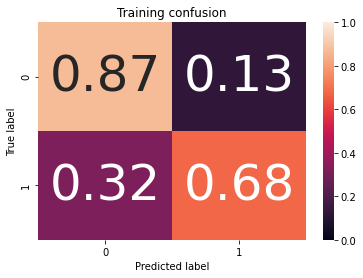

In [26]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=classifier.classes_, title='Training confusion')

In [27]:
print("The F1 score is : ", f1_score(y_test,y_pred))

The F1 score is :  0.7230769230769231


# Split the Dataset with an 70/30 Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
#Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =  sc_X.transform(X_test)

In [30]:
#Define the Model
classifier = KNeighborsClassifier(n_neighbors = 13, p =2 , metric = "euclidean")

In [31]:
#Fit the model
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [32]:
#Predict Test results
y_pred = classifier.predict(X_test)

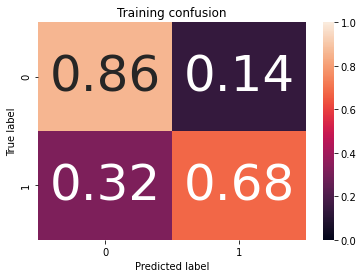

In [33]:
#Evaluate the MOdel
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=classifier.classes_, title='Training confusion')

In [34]:
print("The F1 score is : ", f1_score(y_test,y_pred))

The F1 score is :  0.7120418848167539


# Split the Dataset with an 60/40 Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [36]:
#Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =  sc_X.transform(X_test)

In [37]:
#Define the Model
classifier = KNeighborsClassifier(n_neighbors = 13, p =2 , metric = "euclidean")

In [38]:
#Fit the model
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [39]:
#Predict Test results
y_pred = classifier.predict(X_test)

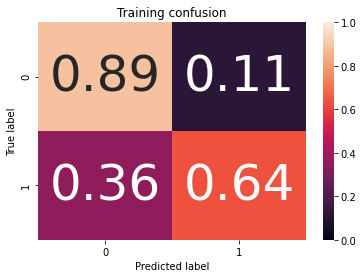

In [40]:
#Evaluate the MOdel
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=classifier.classes_, title='Training confusion')

In [41]:
print("The F1 score is : ", f1_score(y_test,y_pred))

The F1 score is :  0.7016129032258064
